In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

data=pd.read_excel(r'C:\Users\TR\Desktop\统计.xlsx')
# print(data)

data.drop_duplicates()
data = data.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)
x=data[["日期"]]
print(x.shape)
y=data[["餐饮","城镇社会消费品","化妆品类","日用品类","粮油烟酒","体育娱乐","网上零售","中西药品"]]
print(y.shape)

(33, 8)
(33, 1)


In [71]:
# 划分训练集和测试集
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [72]:
X_train

,序号,日期,餐饮,城镇社会消费品,化妆品类,日用品类,粮油烟酒,体育娱乐,网上零售,中西药品
14,15,2018.11,4525.0,35259.7,280.0,537.7,1765.9,73.7,80688.6,532.3
11,12,2019.03,3393.0,31725.7,280.8,470.8,1524.8,53.3,22378.7,502.2
3,4,2019.11,4963.7,38093.8,330.6,643.1,1829.9,82.9,94957.8,522.9
25,26,2017.11,3675.5,34108.2,282.1,545.4,2025.5,83.3,12271.3,886.0
21,22,2018.04,3024.5,28541.9,196.3,393.4,1419.1,52.0,25791.5,459.0
5,6,2019.09,3770.2,34494.9,255.0,534.1,1909.3,59.5,73237.0,522.2
27,28,2017.09,3317.5,30870.3,221.8,494.7,2127.0,64.5,12271.3,891.8
19,20,2018.06,3400.6,30841.6,217.2,469.8,1651.6,65.4,40810.0,484.4
6,7,2019.08,3857.1,33896.3,231.9,503.9,1671.9,54.6,64393.0,476.3
22,23,2018.03,3098.6,29193.6,248.9,423.5,1477.2,56.4,19318.5,470.9


In [62]:
X_test

(11, 10)


In [73]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print(linreg.intercept_)
print(linreg.coef_)

[2014.02826365]
[[-1.03936614e-03  2.20355732e-04 -3.54475849e-03  2.03209981e-02
  -1.86889645e-03 -4.37597737e-02 -1.08741792e-05 -3.15592256e-03]]


In [82]:
y_pred = linreg.predict(x_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg,x,y,cv=8) # cv可以调
print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.16148729622186328
RMSE: 0.4018548198315696


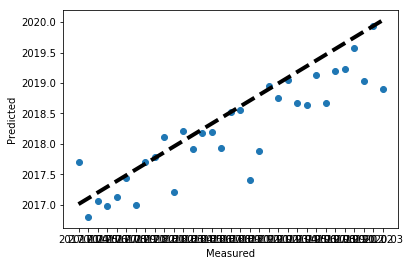

In [83]:
# 可视化图表
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [93]:
# 预测
y_pred = linreg.predict(x_test)
print(y_pred) 

[[2016.86320078]
 [2018.83986417]
 [2019.04392051]
 [2018.78322868]
 [2019.42948697]
 [2018.2154194 ]
 [2017.16369414]
 [2017.61206602]
 [2018.43889488]
 [2017.4816465 ]
 [2016.90364417]]


In [91]:
x_test

,餐饮,城镇社会消费品,化妆品类,日用品类,粮油烟酒,体育娱乐,网上零售,中西药品
32,2885.9,27278.5,176.5,413.5,1659.3,54.3,12271.3,742.4
0,1832.0,26449.9,249.5,467.3,2074.3,50.1,22168.8,448.1
5,3770.2,34494.9,255.0,534.1,1909.3,59.5,73237.0,522.2
9,3631.3,32955.7,233.9,449.2,1532.6,49.9,38641.3,495.5
3,4963.7,38093.8,330.6,643.1,1829.9,82.9,94957.8,522.9
15,4006.0,35534.4,218.2,447.5,1683.1,54.2,70539.1,480.1
31,3210.8,29459.2,196.1,444.0,1766.6,56.7,12271.3,770.0
26,3851.8,34240.9,219.8,494.5,2026.5,65.4,12271.3,774.7
17,3516.1,31542.3,203.1,449.4,1572.2,52.5,55195.5,463.2
24,3689.2,34734.1,261.5,556.6,2283.7,74.9,12271.3,973.0
